In [2]:
import cv2 as cv2
import matplotlib.pyplot as plt

array([[128, 128, 128, ..., 128, 128, 128],
       [128,   9,  10, ...,   4,   4, 128],
       [128,   8,   9, ...,   5,   5, 128],
       ...,
       [128,  85,  85, ...,  13,  13, 128],
       [128,  81,  94, ...,  13,  12, 128],
       [128, 128, 128, ..., 128, 128, 128]], dtype=uint8)

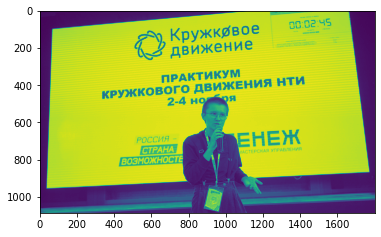

In [15]:
logo = cv2.imread('../logo/small.jpg')
logo = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)

w, h = logo.shape[0], logo.shape[1]

test_image = cv2.imread('../data/positive/asdv.png')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

img_filt = cv2.medianBlur(test_image, 5)
img_th = cv2.adaptiveThreshold(img_filt,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

plt.imshow(test_image)

cv2.drawContours(test_image,contours,-1,(128,255,0),1)
display = cv2.imshow("Objects",test_image)
wait_time = cv2.waitKey(0)
cv2.destroyAllWindows()

res = cv2.matchTemplate(test_image, logo, cv2.TM_SQDIFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)



cv2.rectangle(test_image, min_loc, (min_loc[0] + w, min_loc[1] + h), 255, 2)
# plt.imshow(res)